# **Data-Driven Sustainability: A Focus on Green Energy Consumption Transition and ESG Impacts on People and Business Investments**

## **I. Data Cleaning**

### **Installing and Importing Libraries**

In [2]:
pip install numpy

In [3]:
pip install seaborn

In [4]:
!pip install pandas matplotlib statsmodels


In [5]:
!pip install pandas matplotlib scikit-learn


In [6]:
pip install xgboost

In [7]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [8]:
# Load the dataset
file_path = "energy_consumption_dataset.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Display basic info and check for missing values
print(df.info())
print(df.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB
None
Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage 

In [9]:
# Convert categorical variables if needed
df["Month"] = df["Month"].astype(str)  # Ensure Month is a string
df["Hour"] = df["Hour"].astype(int)    # Ensure Hour is an integer
df["DayOfWeek"] = df["DayOfWeek"].astype(str)  # Convert DayOfWeek to string for visualization

# Handle missing values (if any exist)
df = df.dropna()  # Remove missing values (or use df.fillna() to impute missing data)

# Convert Holiday to binary (0 = Non-Holiday, 1 = Holiday)
df["Holiday"] = df["Holiday"].map({'No': 0, 'Yes': 1}).astype(int)

# Verify the cleaned dataset
print(df.head())

  Month  Hour DayOfWeek  Holiday  Temperature   Humidity  SquareFootage  \
0     1     0  Saturday        0    25.139433  43.431581    1565.693999   
1     1     1  Saturday        0    27.731651  54.225919    1411.064918   
2     1     2  Saturday        0    28.704277  58.907658    1755.715009   
3     1     3  Saturday        0    20.080469  50.371637    1452.316318   
4     1     4  Saturday        0    23.097359  51.401421    1094.130359   

   Occupancy HVACUsage LightingUsage  RenewableEnergy  EnergyConsumption  
0          5        On           Off         2.774699          75.364373  
1          1        On            On        21.831384          83.401855  
2          2       Off           Off         6.764672          78.270888  
3          1       Off            On         8.623447          56.519850  
4          9        On           Off         3.071969          70.811732  


In [10]:
print(df["Month"].dtype)  # Should output 'category'
print(df["Month"].unique())  # Should list months in order


object
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']


In [11]:
# Define month names in order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Convert numeric month to full name
df["Month"] = df["Month"].astype(int)  # Ensure integer type
df["Month"] = df["Month"].apply(lambda x: month_order[x - 1])  # Convert to full month name

# Convert to categorical with specified order
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)

# Check the first few rows to confirm changes
print(df.head())


     Month  Hour DayOfWeek  Holiday  Temperature   Humidity  SquareFootage  \
0  January     0  Saturday        0    25.139433  43.431581    1565.693999   
1  January     1  Saturday        0    27.731651  54.225919    1411.064918   
2  January     2  Saturday        0    28.704277  58.907658    1755.715009   
3  January     3  Saturday        0    20.080469  50.371637    1452.316318   
4  January     4  Saturday        0    23.097359  51.401421    1094.130359   

   Occupancy HVACUsage LightingUsage  RenewableEnergy  EnergyConsumption  
0          5        On           Off         2.774699          75.364373  
1          1        On            On        21.831384          83.401855  
2          2       Off           Off         6.764672          78.270888  
3          1       Off            On         8.623447          56.519850  
4          9        On           Off         3.071969          70.811732  


## **II. Exploratory Data Analysis**

### **1. Energy Consumption Behavior**

<ipython-input-12-17ca61b845f2>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_data = df.groupby("DayOfWeek")["EnergyConsumption"].mean().reset_index()
<ipython-input-12-17ca61b845f2>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = df.groupby("Month")["EnergyConsumption"].mean().reset_index()


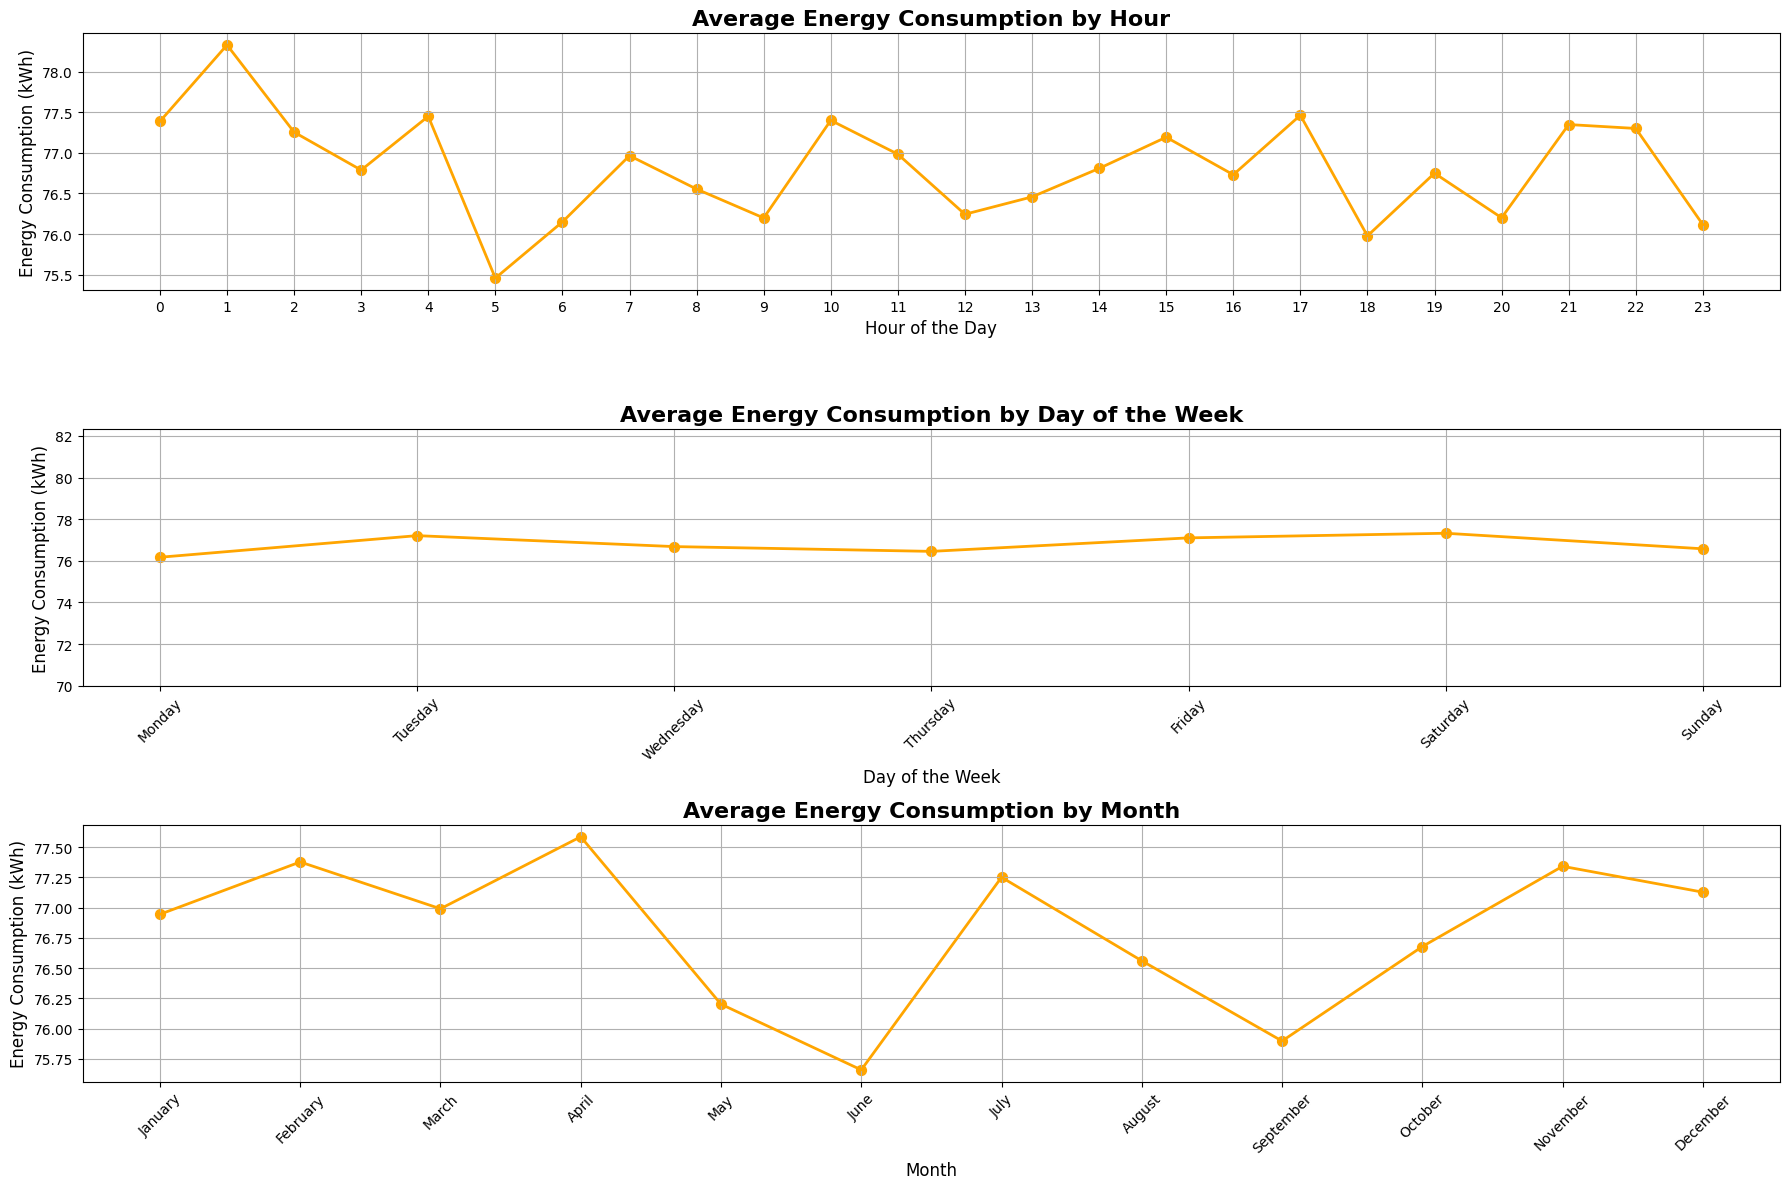

In [12]:
### 🟢 Convert & Format Time Variables
# Define month names and day names in correct order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert Month numbers to full names (only if Month is numeric)
if df["Month"].dtype in ['int64', 'float64']:
    df["Month"] = df["Month"].astype(int).apply(lambda x: month_order[x - 1])
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)

# Convert DayOfWeek numbers to day names (only if numeric)
if df["DayOfWeek"].dtype in ['int64', 'float64']:
    df["DayOfWeek"] = df["DayOfWeek"].astype(int).apply(lambda x: day_order[x])
df["DayOfWeek"] = pd.Categorical(df["DayOfWeek"], categories=day_order, ordered=True)

# Ensure Hour is an integer
df["Hour"] = df["Hour"].astype(int)

### 🟢 Aggregate Data
# Group by Hour, Day of Week, and Month to compute average energy consumption
hourly_data = df.groupby("Hour")["EnergyConsumption"].mean().reset_index()
daily_data = df.groupby("DayOfWeek")["EnergyConsumption"].mean().reset_index()
monthly_data = df.groupby("Month")["EnergyConsumption"].mean().reset_index()

### 🟢 Create Visualizations
plt.figure(figsize=(18, 12))  # Set overall figure size

# 🔸 1. Energy Consumption by Hour
plt.subplot(3, 1, 1)  # 3 rows, 1 column, plot 1
sns.lineplot(data=hourly_data, x="Hour", y="EnergyConsumption", color="orange", linewidth=2)
plt.scatter(hourly_data["Hour"], hourly_data["EnergyConsumption"], color="orange", s=50)  # Dots at data points
plt.title("Average Energy Consumption by Hour", fontsize=16, fontweight="bold")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.xticks(range(0, 24, 1))  # Ensure all hours are shown
plt.grid(True)

# 🔸 2. Energy Consumption by Day of the Week (Week Trend) **Y-axis starts at 70**
plt.subplot(3, 1, 2)  # Plot 2
sns.lineplot(data=daily_data, x="DayOfWeek", y="EnergyConsumption", color="orange", linewidth=2)
plt.scatter(range(len(daily_data)), daily_data["EnergyConsumption"], color="orange", s=50)  # Dots at data points
plt.title("Average Energy Consumption by Day of the Week", fontsize=16, fontweight="bold")
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.xticks(range(len(day_order)), day_order, rotation=45)  # Rotate labels for better visibility
plt.ylim(70, daily_data["EnergyConsumption"].max() + 5)  # ✅ Y-axis starts at 70
plt.grid(True)

# 🔸 3. Energy Consumption by Month
plt.subplot(3, 1, 3)  # Plot 3
sns.lineplot(data=monthly_data, x="Month", y="EnergyConsumption", color="orange", linewidth=2)
plt.scatter(range(len(monthly_data)), monthly_data["EnergyConsumption"], color="orange", s=50)  # Dots at data points
plt.title("Average Energy Consumption by Month", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.xticks(range(len(month_order)), month_order, rotation=45)  # Rotate month names
plt.grid(True)

# 🟢 Adjust Layout and Show Plot
plt.tight_layout()  # Ensures good spacing between plots
plt.show()

import warnings

# Suppress specific FutureWarning about the 'observed' parameter in groupby
warnings.simplefilter(action='ignore', category=FutureWarning)


### **2. Total Energy vs Temperature**

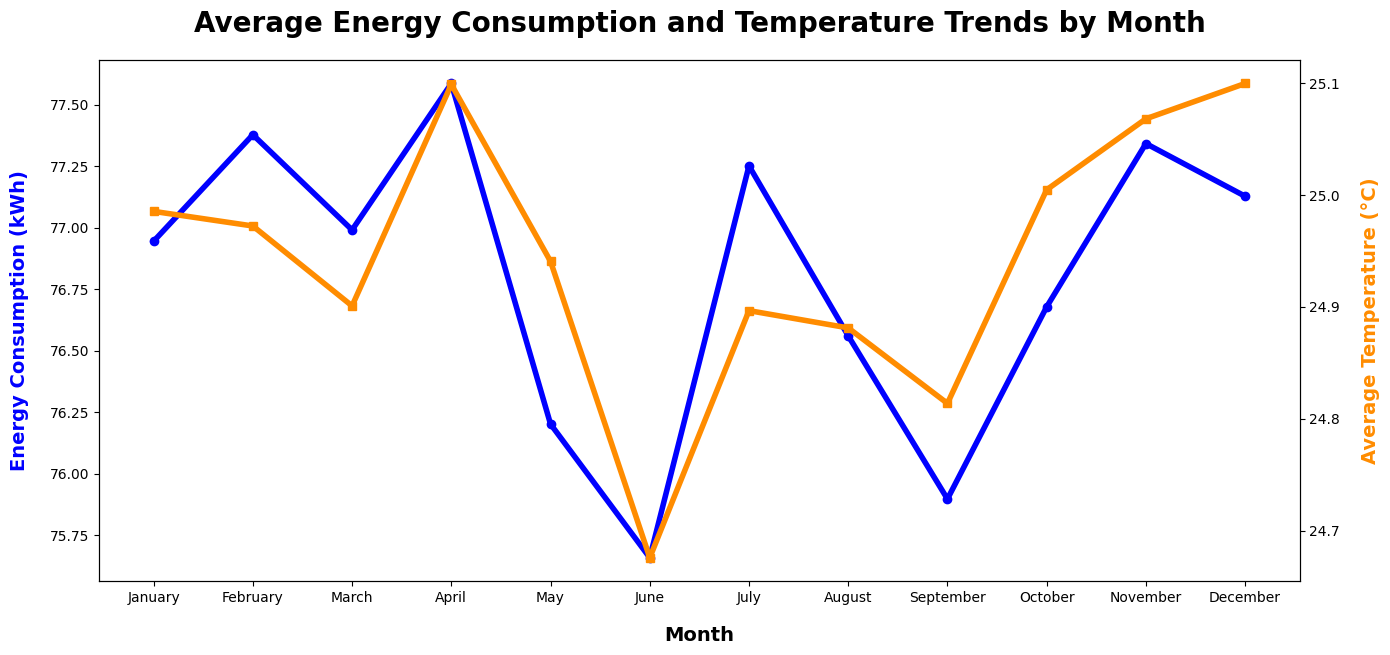

In [ ]:
# Data File
df = pd.read_csv(file_path)

# Define month names in correct order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Convert numeric month to full name
df["Month"] = df["Month"].astype(int)  # Ensure integer format
df["Month"] = df["Month"].apply(lambda x: month_order[x - 1])  # Map to month names

# Convert to categorical with the correct order
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)

# Group by month and calculate the mean temperature and energy consumption
monthly_data = df.groupby("Month", observed=True).agg({
    "Temperature": "mean",  # Average temperature
    "EnergyConsumption": "mean"  # Average energy consumption
}).reset_index()

# Sort data by categorical month order
monthly_data = monthly_data.sort_values("Month")  # Ensure correct plotting order

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Energy Consumption trend (Blue)
ax1.plot(monthly_data["Month"], monthly_data["EnergyConsumption"], marker='o', linestyle='-',
         color='blue', linewidth=4, label="Energy Consumption (kWh)")

# Create a twin y-axis for Temperature
ax2 = ax1.twinx()
ax2.plot(monthly_data["Month"], monthly_data["Temperature"], marker='s', linestyle='-',
         color='darkorange', linewidth=4, label="Temperature (°C)")

# Labels and Titles
ax1.set_xlabel('Month', fontsize=14, fontweight='bold', labelpad=15)
ax1.set_ylabel('Energy Consumption (kWh)', fontsize=14, fontweight='bold', labelpad=15, color='blue')
ax2.set_ylabel('Average Temperature (°C)', fontsize=14, fontweight='bold', labelpad=15, color='darkorange')

# Set Y-axis tick color to black
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

ax1.set_title('Average Energy Consumption and Temperature Trends by Month', fontsize=20, fontweight='bold', color='black', pad=20)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### **3. Renewable Energy vs Temperature**

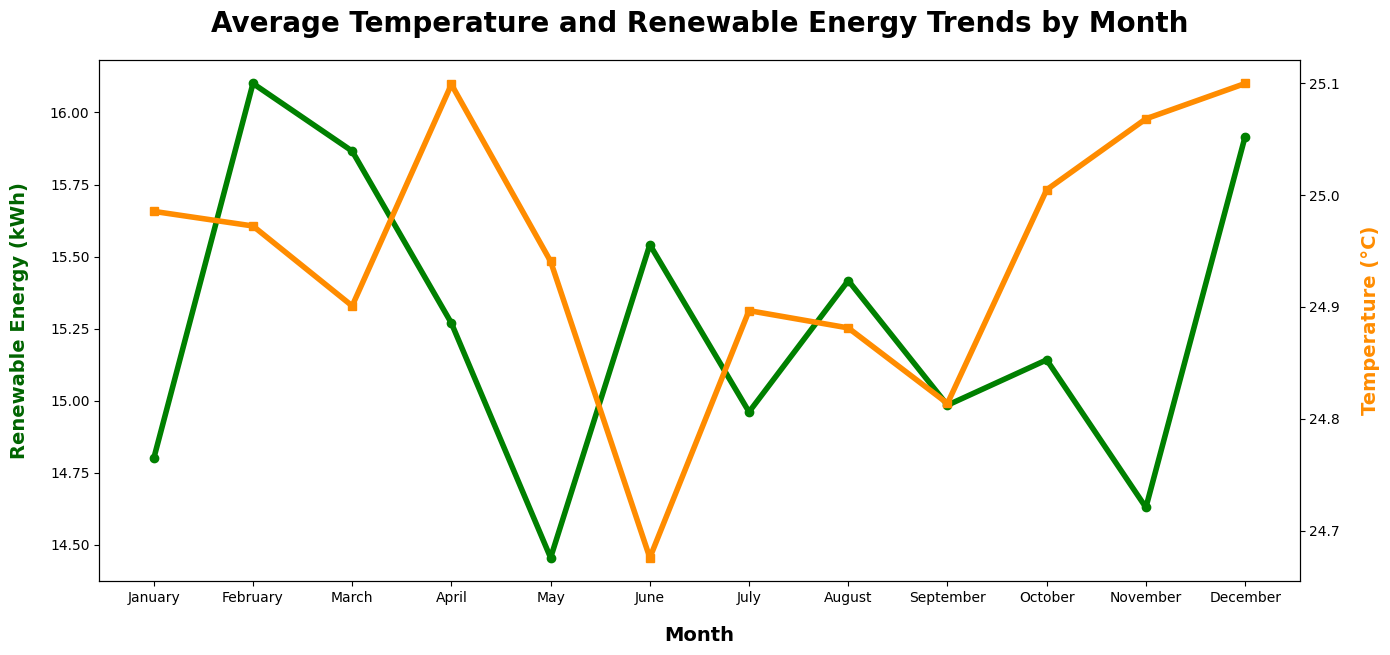

In [ ]:
# Data File
df = pd.read_csv(file_path)

# Define month names in correct order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Convert numeric month to full name
df["Month"] = df["Month"].astype(int)  # Ensure integer format
df["Month"] = df["Month"].apply(lambda x: month_order[x - 1])  # Map to month names

# Convert to categorical with the correct order
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)

# Group by month and calculate the mean temperature and renewable energy
monthly_data = df.groupby("Month", observed=True).agg({
    "Temperature": "mean",  # Average temperature
    "RenewableEnergy": "mean"  # Average renewable energy consumption
}).reset_index()

# Sort data by categorical month order
monthly_data = monthly_data.sort_values("Month")  # Ensure correct plotting order

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Renewable Energy trend (Green)
ax1.plot(monthly_data["Month"], monthly_data["RenewableEnergy"], marker='o', linestyle='-',
         color='green', linewidth=4)

# Create a twin y-axis for Temperature
ax2 = ax1.twinx()
ax2.plot(monthly_data["Month"], monthly_data["Temperature"], marker='s', linestyle='-',
         color='darkorange', linewidth=4)

# Labels and Titles
ax1.set_xlabel('Month', fontsize=14, fontweight='bold', labelpad=15)
ax1.set_ylabel('Renewable Energy (kWh)', fontsize=14, fontweight='bold', labelpad=15, color='darkgreen')
ax2.set_ylabel('Temperature (°C)', fontsize=14, fontweight='bold', labelpad=15, color='darkorange')

# Set Y-axis tick color to black
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

ax1.set_title('Average Temperature and Renewable Energy Trends by Month', fontsize=20, fontweight='bold', color='black', pad=20)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### **4. Correlation Matrix**

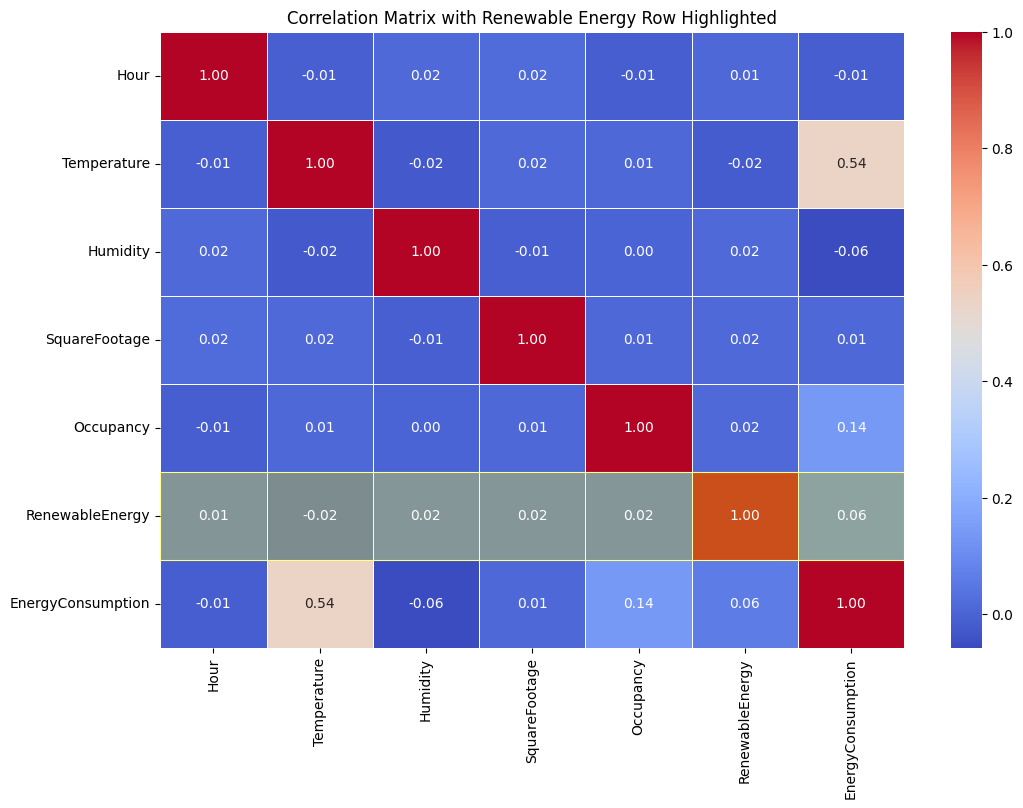

In [ ]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for all numeric attributes
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Highlight the 'RenewableEnergy' row
renewable_index = correlation_matrix.index.get_loc('RenewableEnergy')
ax.add_patch(plt.Rectangle((0, renewable_index), len(correlation_matrix.columns), 1, color='yellow', alpha=0.3))

plt.title('Correlation Matrix with Renewable Energy Row Highlighted')
plt.show()


### **5. Average Occupancy Demographics and Temperature**

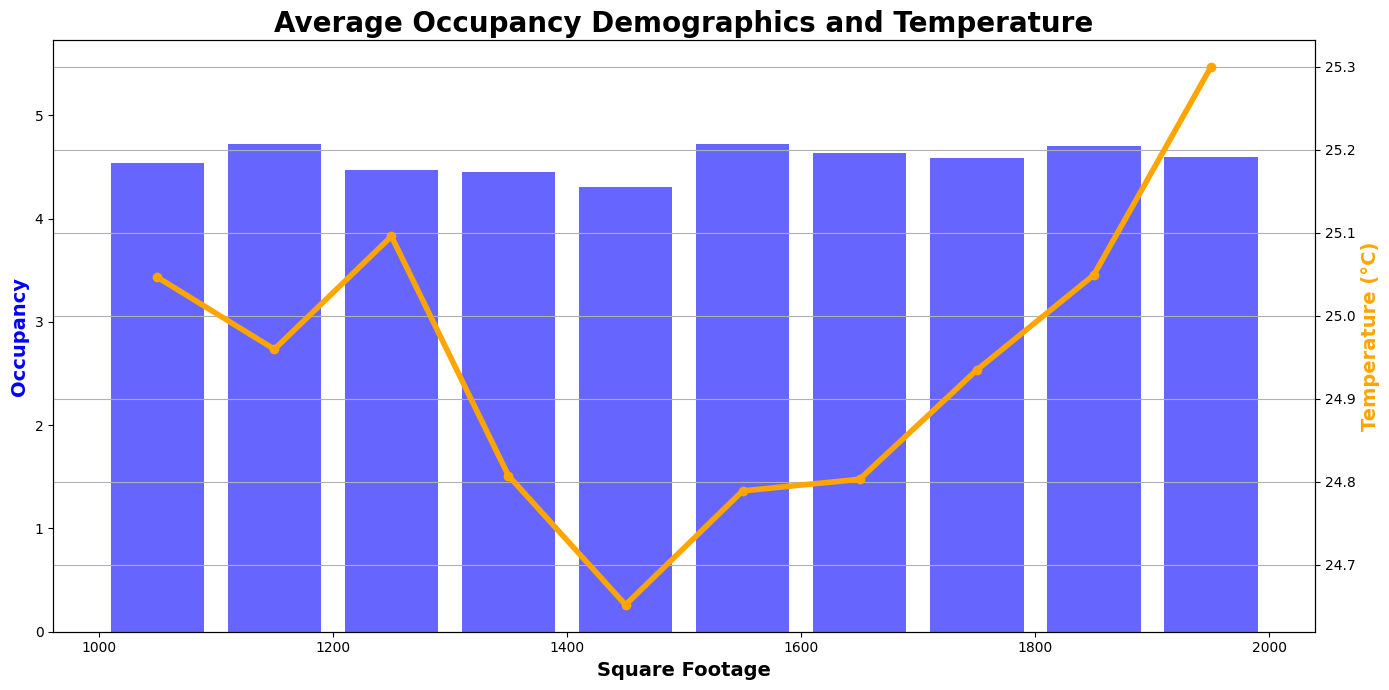

In [13]:
import warnings

# Suppress specific FutureWarning about the 'observed' parameter in groupby
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data File
df = pd.read_csv(file_path)

# Create the histogram
bin_width = 100
bins = range(int(df["SquareFootage"].min()), int(df["SquareFootage"].max()) + bin_width, bin_width)
df['SquareFootage_Binned'] = pd.cut(df['SquareFootage'], bins=bins, right=False)

# Group by the binned square footage and calculate the average occupancy and mean temperature
occupancy_count = df.groupby('SquareFootage_Binned').agg({'Occupancy': 'mean', 'Temperature': 'mean'}).reset_index()

# Convert bin edges to midpoints for plotting
occupancy_count['SquareFootage_Mid'] = occupancy_count['SquareFootage_Binned'].apply(lambda x: x.left + bin_width / 2)

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the average occupancy count as bars
ax1.bar(occupancy_count['SquareFootage_Mid'], occupancy_count['Occupancy'], width=bin_width * 0.8, color='blue', alpha=0.6)
ax1.set_xlabel('Square Footage', fontsize=14, fontweight='bold')
ax1.set_ylabel('Occupancy', fontsize=14, fontweight='bold', color='blue')  # Title updated to "Average Occupancy"
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(occupancy_count['Occupancy']) + 1)  # Adjusted to start from 0 for average

# Create a twin y-axis to plot the mean temperature as a line
ax2 = ax1.twinx()
ax2.plot(occupancy_count['SquareFootage_Mid'], occupancy_count['Temperature'], marker='o', color='orange', linewidth=4)
ax2.set_ylabel('Temperature (°C)', fontsize=14, fontweight='bold', color='orange')  # Title in orange color
ax2.tick_params(axis='y', labelcolor='black')

# Set the title
plt.title('Average Occupancy Demographics and Temperature', fontsize=20, fontweight='bold')

# Add grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


### **6. Average HVAC Usage by Occupancy Demographics**

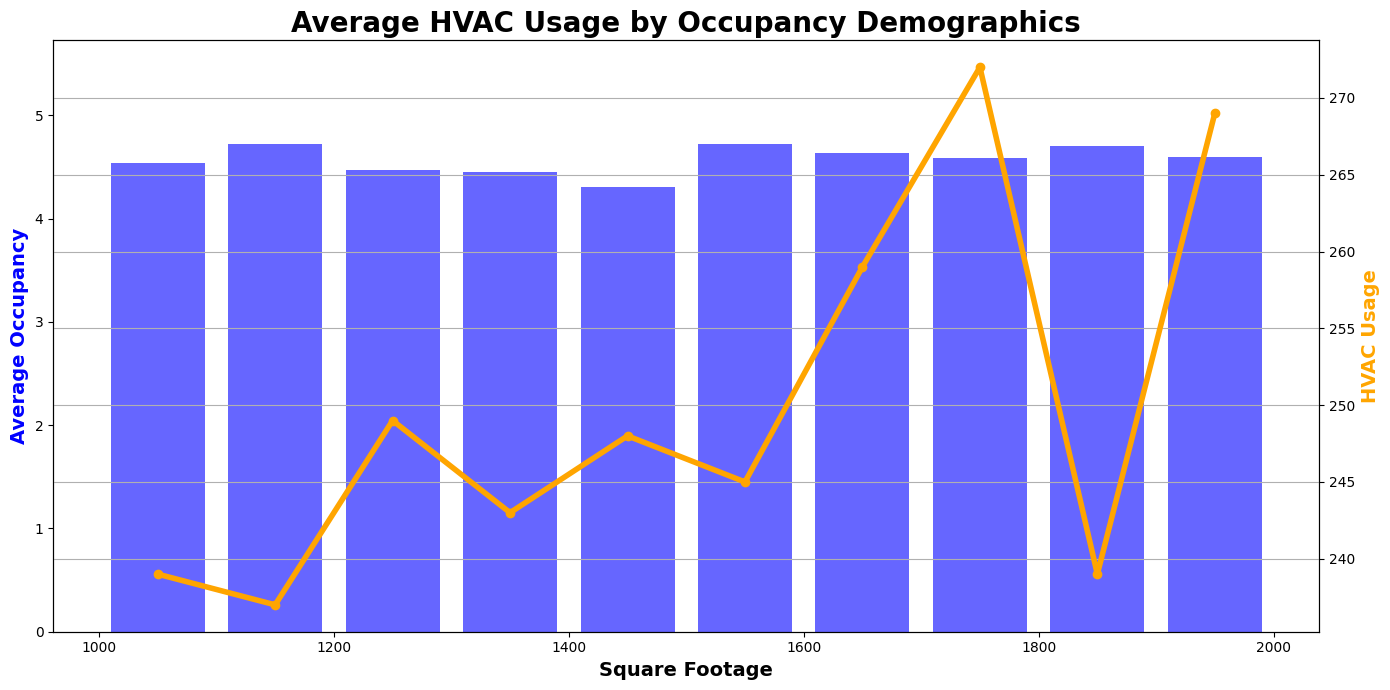

In [14]:
import warnings

# Suppress specific FutureWarning about the 'observed' parameter in groupby
warnings.simplefilter(action='ignore', category=FutureWarning)


# Data File
df = pd.read_csv(file_path)

# Create the histogram
bin_width = 100
bins = range(int(df["SquareFootage"].min()), int(df["SquareFootage"].max()) + bin_width, bin_width)
df['SquareFootage_Binned'] = pd.cut(df['SquareFootage'], bins=bins, right=False)

# Group by the binned square footage and calculate the average occupancy, mean temperature, and HVAC usage count
occupancy_count = df.groupby('SquareFootage_Binned').agg({
    'Occupancy': 'mean',  # Averaging occupancy
    'Temperature': 'mean',
    'HVACUsage': lambda x: (x == 'On').sum()
}).reset_index()

# Convert bin edges to midpoints for plotting
occupancy_count['SquareFootage_Mid'] = occupancy_count['SquareFootage_Binned'].apply(lambda x: x.left + bin_width / 2)

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the average occupancy as bars
ax1.bar(occupancy_count['SquareFootage_Mid'], occupancy_count['Occupancy'], width=bin_width * 0.8, color='blue', alpha=0.6)
ax1.set_xlabel('Square Footage', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average Occupancy', fontsize=14, fontweight='bold', color='blue')  # Title updated to "Average Occupancy"
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(occupancy_count['Occupancy']) + 1)  # Adjusted to start from 0 for average

# Create a twin y-axis to plot the HVAC usage as a line
ax2 = ax1.twinx()
ax2.plot(occupancy_count['SquareFootage_Mid'], occupancy_count['HVACUsage'], marker='o', color='orange', linewidth=4)
ax2.set_ylabel('HVAC Usage', fontsize=14, fontweight='bold', color='orange')  # Title updated to "HVAC Usage"
ax2.tick_params(axis='y', labelcolor='black')

# Set the title
plt.title('Average HVAC Usage by Occupancy Demographics', fontsize=20, fontweight='bold')

# Add grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


### **7. Average Lighting Usage by Occupancy Demographics**

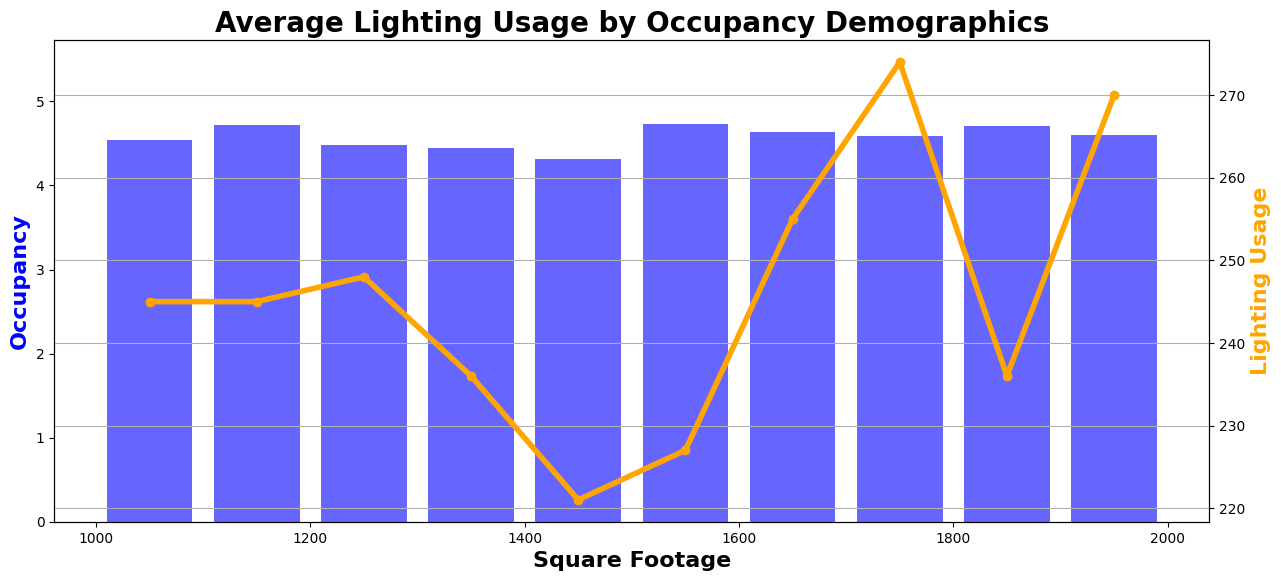

In [15]:
import warnings

# Suppress specific FutureWarning about the 'observed' parameter in groupby
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data File
df = pd.read_csv(file_path)

# Create the histogram
bin_width = 100
bins = range(int(df["SquareFootage"].min()), int(df["SquareFootage"].max()) + bin_width, bin_width)
df['SquareFootage_Binned'] = pd.cut(df['SquareFootage'], bins=bins, right=False)

# Group by the binned square footage and calculate the average occupancy, mean temperature, and lighting usage count
occupancy_count = df.groupby('SquareFootage_Binned').agg({
    'Occupancy': 'mean',  # Averaging occupancy
    'Temperature': 'mean',
    'LightingUsage': lambda x: (x == 'On').sum()  # Changed HVAC to LightingUsage
}).reset_index()

# Convert bin edges to midpoints for plotting
occupancy_count['SquareFootage_Mid'] = occupancy_count['SquareFootage_Binned'].apply(lambda x: x.left + bin_width / 2)

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the average occupancy as bars
ax1.bar(occupancy_count['SquareFootage_Mid'], occupancy_count['Occupancy'], width=bin_width * 0.8, color='blue', alpha=0.6)
ax1.set_xlabel('Square Footage', fontsize=16, fontweight='bold')
ax1.set_ylabel('Occupancy', fontsize=16, fontweight='bold', color='blue')  # Title updated to "Average Occupancy"
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(occupancy_count['Occupancy']) + 1)  # Adjusted to start from 0 for average

# Create a twin y-axis to plot the lighting usage as a line
ax2 = ax1.twinx()
ax2.plot(occupancy_count['SquareFootage_Mid'], occupancy_count['LightingUsage'], marker='o', color='orange', linewidth=4)
ax2.set_ylabel('Lighting Usage', fontsize=16, fontweight='bold', color='orange')  # Title updated to "Lighting Usage"
ax2.tick_params(axis='y', labelcolor='black')

# Set the title
plt.title('Average Lighting Usage by Occupancy Demographics', fontsize=20, fontweight='bold')

# Add grid and show the plot with some spacing for titles
plt.grid(True)
plt.tight_layout(pad=5)  # Added more space around the plot
plt.show()


### **8. Monthly Trends of Renewable and Non-Renewable Energy**

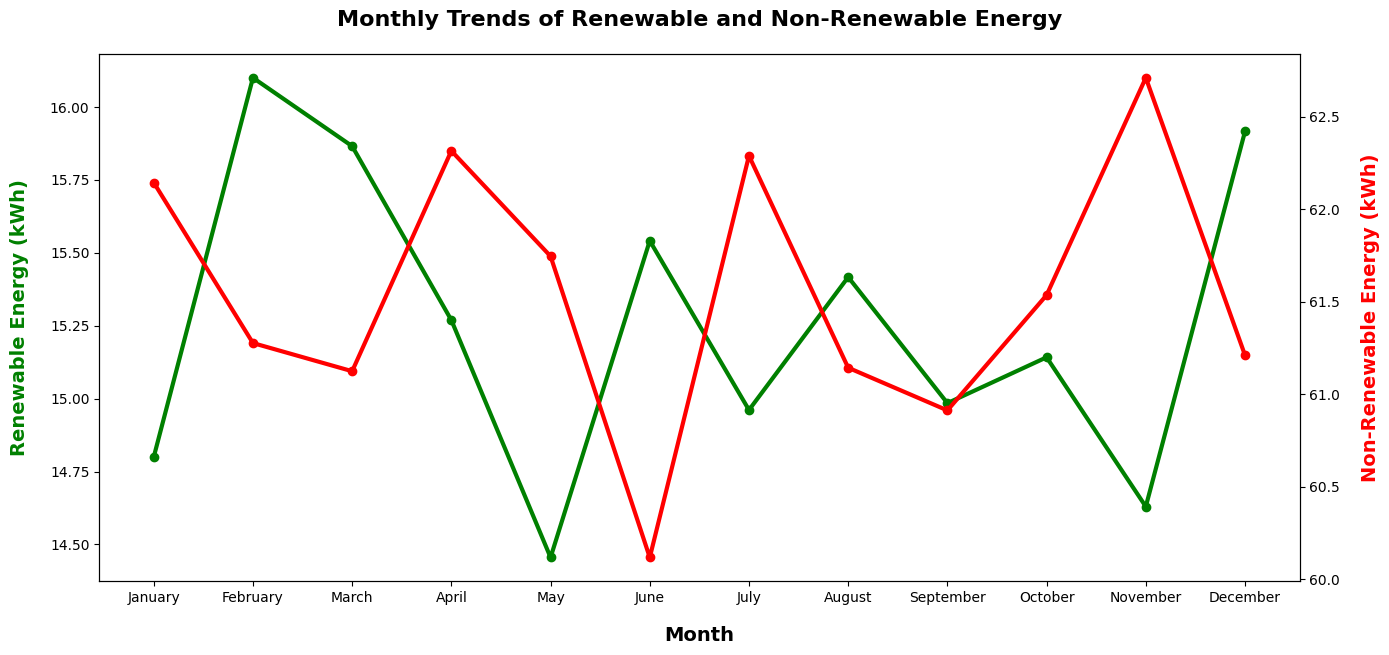

In [ ]:
# Data File
df = pd.read_csv(file_path)

# Define month names in correct order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Convert numeric month to full name
df["Month"] = df["Month"].astype(int)  # Ensure integer format
df["Month"] = df["Month"].apply(lambda x: month_order[x - 1])  # Map to month names

# Convert to categorical with the correct order
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)

# Calculate Non-Renewable Energy (Energy Consumption - Renewable Energy)
df['NonRenewableEnergy'] = df['EnergyConsumption'] - df['RenewableEnergy']

# Group by month and calculate the mean for renewable energy and non-renewable energy
monthly_data = df.groupby("Month", observed=True).agg({
    "RenewableEnergy": "mean",
    "NonRenewableEnergy": "mean"
}).reset_index()

# Sort data by categorical month order
monthly_data = monthly_data.sort_values("Month")  # Ensure correct plotting order

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the renewable energy trend (in green)
ax1.plot(monthly_data["Month"], monthly_data["RenewableEnergy"], marker='o', color='green', linewidth=3)
ax1.set_xlabel('Month', fontsize=14, fontweight='bold', labelpad=15)
ax1.set_ylabel('Renewable Energy (kWh)', fontsize=14, fontweight='bold', labelpad=15, color='green')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Monthly Trends of Renewable and Non-Renewable Energy', fontsize=16, fontweight='bold', color='black', pad=20)

# Create a twin y-axis to plot the non-renewable energy trend (in red)
ax2 = ax1.twinx()
ax2.plot(monthly_data["Month"], monthly_data["NonRenewableEnergy"], marker='o', color='red', linewidth=3)
ax2.set_ylabel('Non-Renewable Energy (kWh)', fontsize=14, fontweight='bold', labelpad=15, color='red')
ax2.tick_params(axis='y', labelcolor='black')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust layout for a cleaner appearance
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


### **9. Energy Consumption Distribution**

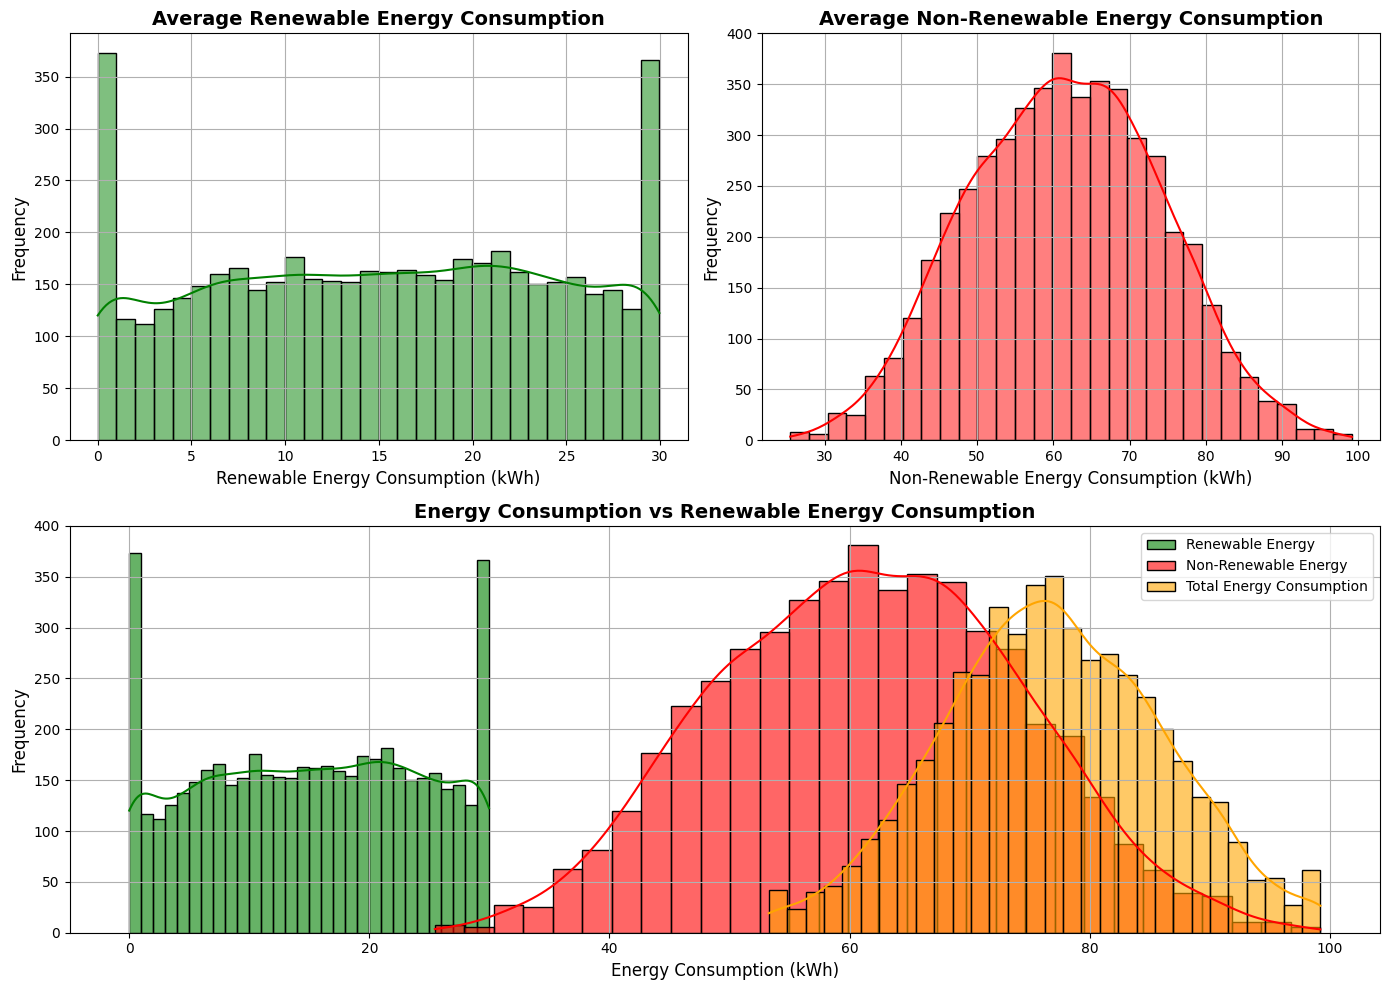

In [ ]:
# Data File
df = pd.read_csv(file_path)

# Calculate Non-Renewable Energy as the difference between Total Energy and Renewable Energy
df["NonRenewableEnergy"] = df["EnergyConsumption"] - df["RenewableEnergy"]

# 🟢 Create Histograms for Renewable Energy, Non-Renewable Energy, and Total Energy Consumption
plt.figure(figsize=(14, 10))  # Set figure size

# 🔸 1. Histogram for Renewable Energy Consumption (Top-Left)
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first plot
sns.histplot(df["RenewableEnergy"], bins=30, kde=True, color="green")
plt.title("Average Renewable Energy Consumption", fontsize=14, fontweight="bold")
plt.xlabel("Renewable Energy Consumption (kWh)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)

# 🔸 2. Histogram for Non-Renewable Energy Consumption (Top-Right)
plt.subplot(2, 2, 2)  # Second plot
sns.histplot(df["NonRenewableEnergy"], bins=30, kde=True, color="red")
plt.title("Average Non-Renewable Energy Consumption", fontsize=14, fontweight="bold")
plt.xlabel("Non-Renewable Energy Consumption (kWh)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)

# 🔸 3. Overlayed Histogram for Renewable Energy, Non-Renewable Energy, and Total Energy Consumption (Bottom, Centered)
plt.subplot(2, 1, 2)  # One full-width plot below
sns.histplot(df["RenewableEnergy"], bins=30, kde=True, color="green", label="Renewable Energy", alpha=0.6)
sns.histplot(df["NonRenewableEnergy"], bins=30, kde=True, color="red", label="Non-Renewable Energy", alpha=0.6)
sns.histplot(df["EnergyConsumption"], bins=30, kde=True, color="orange", label="Total Energy Consumption", alpha=0.6)
plt.title("Energy Consumption vs Renewable Energy Consumption", fontsize=14, fontweight="bold")
plt.xlabel("Energy Consumption (kWh)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True)

# 🟢 Adjust Layout and Show Plot
plt.tight_layout()  # Ensures proper spacing
plt.show()


## **III. Building Predicting Models**

### **1. Sensitivity Analysis**

Applying sensitivity analysis to explore how changes in occupancy levels influence energy consumption, specifically focusing on renewable and non-renewable energy usage. The data is grouped by month, with average values for renewable energy, total consumption, and occupancy calculated. Linear regression models predict energy outcomes based on occupancy variations. A sensitivity analysis is conducted by simulating occupancy levels from 4 to 7, showing their effect on energy consumption and renewable energy production. The findings are presented in subplots, emphasizing key occupancy thresholds. This analysis helps optimize energy management and demonstrates how occupancy impacts sustainability in energy use.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


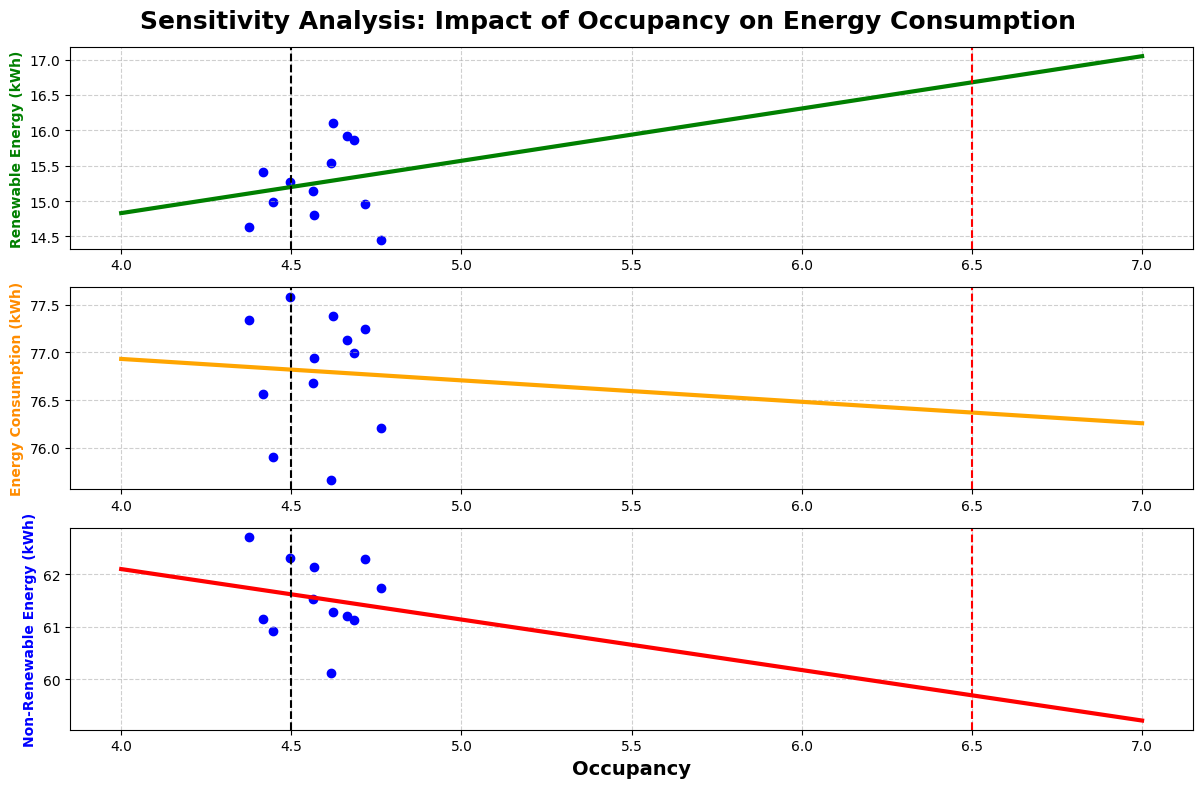

In [17]:
import warnings

# Suppress specific FutureWarning about the 'observed' parameter in groupby
warnings.simplefilter(action='ignore', category=FutureWarning)

# Group by month and calculate mean renewable energy, energy consumption & average occupancy
monthly_data = df.groupby("Month").agg({
    "RenewableEnergy": "mean",
    "EnergyConsumption": "mean",
    "Occupancy": "mean"
}).reset_index()

# Prepare data for regression
X = monthly_data[["Occupancy"]]  # Independent variable
y_renewable = monthly_data["RenewableEnergy"]  # Dependent variable for Renewable Energy
y_consumption = monthly_data["EnergyConsumption"]  # Dependent variable for Energy Consumption

# Calculate non-renewable energy as the difference between total energy consumption and renewable energy
monthly_data["NonRenewableEnergy"] = monthly_data["EnergyConsumption"] - monthly_data["RenewableEnergy"]
y_non_renewable = monthly_data["NonRenewableEnergy"]  # Dependent variable for Non-Renewable Energy

# Train Linear Regression models
model_renewable = LinearRegression()
model_renewable.fit(X, y_renewable)

model_consumption = LinearRegression()
model_consumption.fit(X, y_consumption)

model_non_renewable = LinearRegression()
model_non_renewable.fit(X, y_non_renewable)

# Sensitivity range: Vary occupancy from 4 to 7
occupancy_values = np.linspace(4, 7, 50).reshape(-1, 1)  # Make sure occupancy_values is 2D

# Predict Renewable Energy, Energy Consumption, and Non-Renewable Energy for different occupancy levels
predicted_renewable = model_renewable.predict(occupancy_values)
predicted_consumption = model_consumption.predict(occupancy_values)
predicted_non_renewable = model_non_renewable.predict(occupancy_values)

# Plot Sensitivity Analysis for Renewable Energy, Energy Consumption, and Non-Renewable Energy
plt.figure(figsize=(12, 8))

# Plot for Renewable Energy
plt.subplot(3, 1, 1)  # First subplot for Renewable Energy
plt.plot(occupancy_values, predicted_renewable, color='green', linewidth=3)
plt.scatter(monthly_data["Occupancy"], monthly_data["RenewableEnergy"], color='blue')
plt.ylabel('Renewable Energy (kWh)', fontsize=10, fontweight='bold', color='green')  # Smaller y-axis title
plt.axvline(x=4.5, linestyle="dashed", color="black")
plt.axvline(x=6.5, linestyle="dashed", color="red")
plt.grid(True, linestyle="--", alpha=0.6)

# Plot for Energy Consumption
plt.subplot(3, 1, 2)  # Second subplot for Energy Consumption
plt.plot(occupancy_values, predicted_consumption, color='orange', linewidth=3)
plt.scatter(monthly_data["Occupancy"], monthly_data["EnergyConsumption"], color='blue')
plt.ylabel('Energy Consumption (kWh)', fontsize=10, fontweight='bold', color='darkorange')  # Smaller y-axis title
plt.axvline(x=4.5, linestyle="dashed", color="black")
plt.axvline(x=6.5, linestyle="dashed", color="red")
plt.grid(True, linestyle="--", alpha=0.6)

# Plot for Non-Renewable Energy
plt.subplot(3, 1, 3)  # Third subplot for Non-Renewable Energy
plt.plot(occupancy_values, predicted_non_renewable, color='red', linewidth=3)
plt.scatter(monthly_data["Occupancy"], monthly_data["NonRenewableEnergy"], color='blue')
plt.xlabel('Occupancy', fontsize=14, fontweight='bold')
plt.ylabel('Non-Renewable Energy (kWh)', fontsize=10, fontweight='bold', color='blue')  # Smaller y-axis title
plt.axvline(x=4.5, linestyle="dashed", color="black")
plt.axvline(x=6.5, linestyle="dashed", color="red")
plt.grid(True, linestyle="--", alpha=0.6)

# Adjust spacing between subplots (increased for more space)
plt.subplots_adjust(hspace=0.8)  # Further increase space between plots

# Add overall title for all subplots
plt.suptitle('Sensitivity Analysis: Impact of Occupancy on Energy Consumption', fontsize=18, fontweight='bold')

# Show the plot
plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()


### **2. Renewable Energy Improvement Demographics**

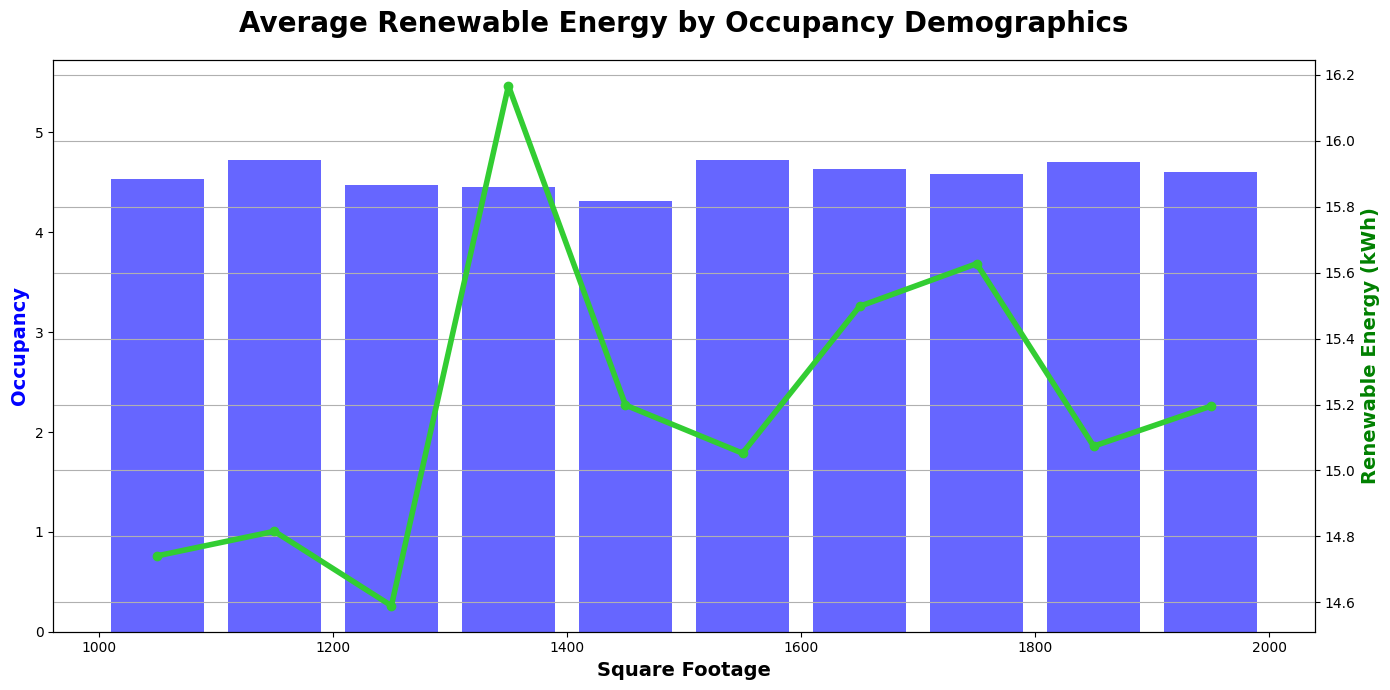

In [18]:
import warnings

# Suppress specific FutureWarning about the 'observed' parameter in groupby
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create the histogram
bin_width = 100
bins = range(int(df["SquareFootage"].min()), int(df["SquareFootage"].max()) + bin_width, bin_width)
df['SquareFootage_Binned'] = pd.cut(df['SquareFootage'], bins=bins, right=False)

# Group by the binned square footage and calculate the average occupancy and mean renewable energy
occupancy_count = df.groupby('SquareFootage_Binned').agg({'Occupancy': 'mean', 'RenewableEnergy': 'mean'}).reset_index()

# Convert bin edges to midpoints for plotting
occupancy_count['SquareFootage_Mid'] = occupancy_count['SquareFootage_Binned'].apply(lambda x: x.left + bin_width / 2)

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the average occupancy as bars with light blue color
ax1.bar(occupancy_count['SquareFootage_Mid'], occupancy_count['Occupancy'], width=bin_width * 0.8, color='blue', alpha=0.6)
ax1.set_xlabel('Square Footage', fontsize=14, fontweight='bold')
ax1.set_ylabel('Occupancy', fontsize=14, fontweight='bold', color='blue')  # Title updated to "Average Occupancy"
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(occupancy_count['Occupancy']) + 1)  # Adjusted to start from 0 for average

# Create a twin y-axis to plot the mean renewable energy as a green line
ax2 = ax1.twinx()
ax2.plot(occupancy_count['SquareFootage_Mid'], occupancy_count['RenewableEnergy'], marker='o', color='limegreen', linewidth=4)
ax2.set_ylabel('Renewable Energy (kWh)', fontsize=14, fontweight='bold', color='green')
ax2.tick_params(axis='y', labelcolor='black')

# Set the title with extra space from the plot
plt.title('Average Renewable Energy by Occupancy Demographics', fontsize=20, fontweight='bold', pad=20)

# Add grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


### **3. Non-Renewable Energy on Humidity**

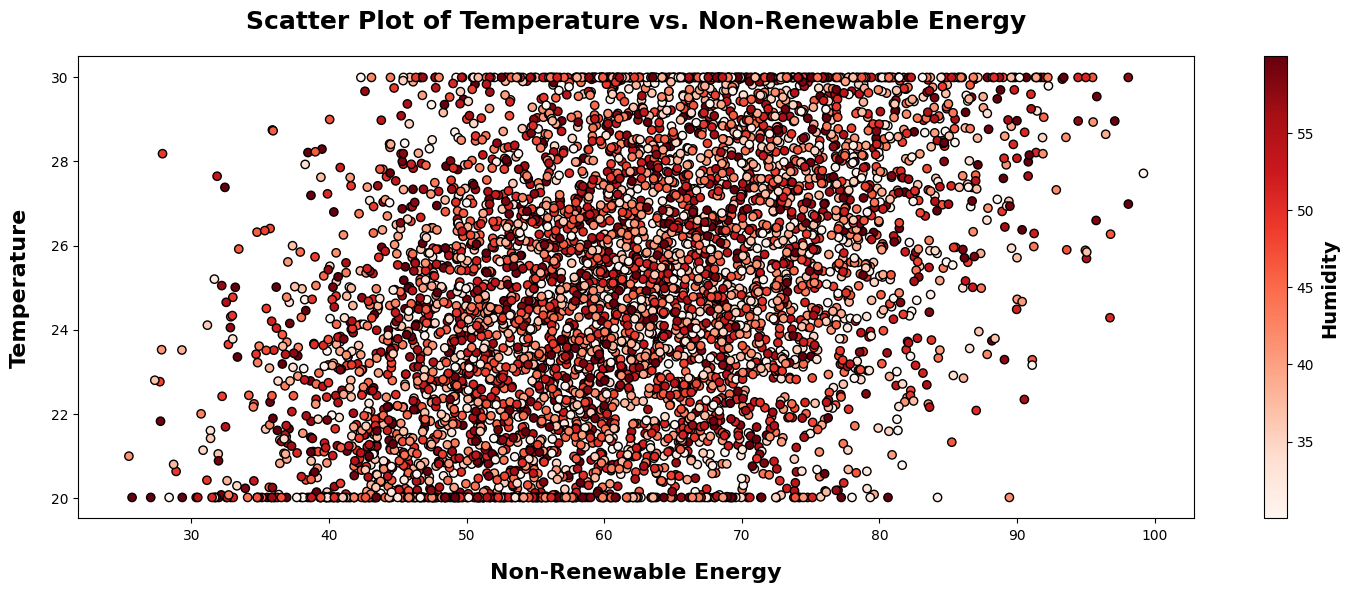

In [ ]:
# Create a new column for non-renewable energy
df['NonRenewableEnergy'] = df['EnergyConsumption'] - df['RenewableEnergy']

# Scatter plot
plt.figure(figsize=(18, 6))
scatter = plt.scatter(df['NonRenewableEnergy'], df['Temperature'], c=df['Humidity'], cmap='Reds', edgecolor='k')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Humidity', fontsize=14, fontweight='bold')

# Labels and title with increased size and bold font
plt.xlabel('Non-Renewable Energy', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('Temperature', fontsize=16, fontweight='bold', labelpad=15)
plt.title('Scatter Plot of Temperature vs. Non-Renewable Energy',
          fontsize=18, fontweight='bold', pad=20)

# Show the plot
plt.show()


### **4. Renewable Energy Simulation in Full Capacity**

This part simulates renewable energy values with a realistic upper limit of 100 kWh while maintaining the correlation between renewable energy, temperature, and humidity. Using a multivariate normal distribution, it generates synthetic values that reflect historical trends and dependencies. The scaling factor ensures the simulated data aligns with the defined maximum. A scatter plot visually represents the relationship between temperature and renewable energy, with a color gradient indicating humidity levels, providing insights into how these environmental factors interact with energy production.

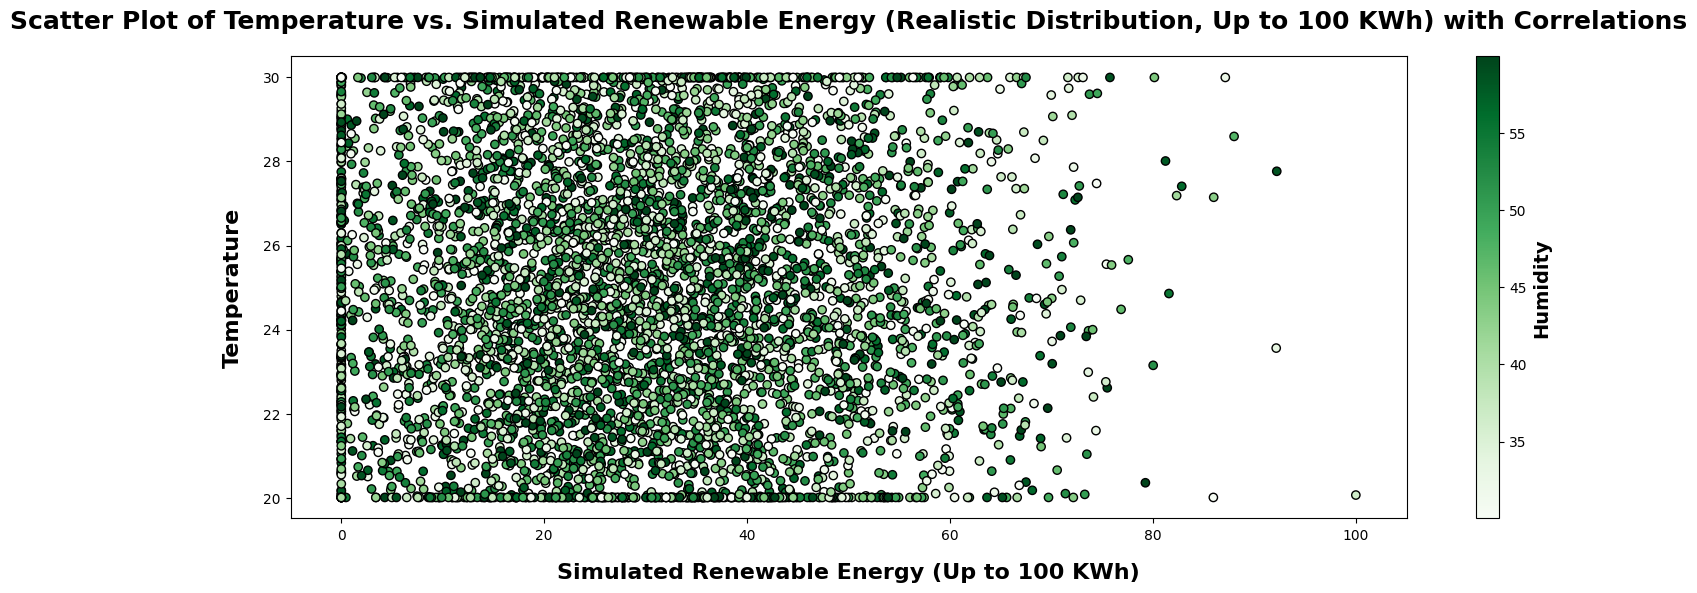

In [ ]:
# Set realistic maximum value for renewable energy
max_renewable_energy = 100  # The target max value for renewable energy
current_max_renewable_energy = df['RenewableEnergy'].max()

# Calculate the scaling factor to stretch values to a new max
scaling_factor = max_renewable_energy / current_max_renewable_energy

# Simulate new RenewableEnergy values using a multivariate normal distribution, taking correlations into account
mean_renewable_energy = df['RenewableEnergy'].mean()
std_renewable_energy = df['RenewableEnergy'].std()

# Define the correlation matrix (with values based on given correlation)
corr_matrix = np.array([[1, -0.02, 0.02],  # RenewableEnergy, Temperature, Humidity
                        [-0.02, 1, 0],    # Temperature, Humidity
                        [0.02, 0, 1]])    # Humidity

# Create a covariance matrix from correlation matrix (using standard deviations)
cov_matrix = np.outer([std_renewable_energy, df['Temperature'].std(), df['Humidity'].std()],
                      [std_renewable_energy, df['Temperature'].std(), df['Humidity'].std()]) * corr_matrix

# Generate simulated values using multivariate normal distribution
mean_vector = np.array([mean_renewable_energy, df['Temperature'].mean(), df['Humidity'].mean()])
simulated_data = np.random.multivariate_normal(mean_vector, cov_matrix, size=len(df))

# Extract the simulated Renewable Energy and scale it to the new max
simulated_renewable_energy = simulated_data[:, 0]
simulated_renewable_energy = np.clip(simulated_renewable_energy, 0, max_renewable_energy)

# Scale the simulated renewable energy to ensure it reaches the desired max value
scaling_factor = max_renewable_energy / np.max(simulated_renewable_energy)
simulated_renewable_energy *= scaling_factor

# Now update the DataFrame with the simulated renewable energy values
df['Simulated_RenewableEnergy'] = simulated_renewable_energy

# Scatter plot with simulated data
plt.figure(figsize=(18, 6))
scatter = plt.scatter(df['Simulated_RenewableEnergy'], df['Temperature'], c=df['Humidity'], cmap='Greens', edgecolor='k')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Humidity', fontsize=14, fontweight='bold')

# Labels and title with increased size and bold font
plt.xlabel('Simulated Renewable Energy (Up to 100 KWh)', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('Temperature', fontsize=16, fontweight='bold', labelpad=15)
plt.title('Scatter Plot of Temperature vs. Simulated Renewable Energy (Realistic Distribution, Up to 100 KWh) with Correlations',
          fontsize=18, fontweight='bold', pad=20)

# Show the plot
plt.show()


### **5. Predicting Green Energy Adoption**

The purpose of this code is to analyze and forecast renewable energy consumption using an XGBoost regression model. It processes energy data by converting categorical variables, aggregating monthly trends, and splitting the dataset into training (80%) and testing (20%) sets to evaluate model performance. The model is trained using historical data and tested on unseen data to assess accuracy. It then forecasts renewable energy trends for the next 12 months by simulating future conditions and adding fluctuations through noise, sine waves, and a random walk. The results are visualized, showing both historical trends and forecasted renewable energy variations.

Mean Squared Error: 0.28


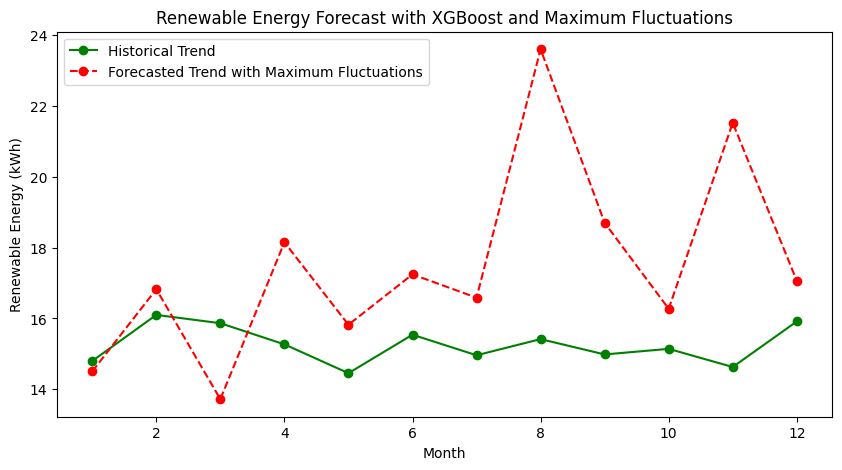

In [ ]:
# Convert categorical variables to numeric (if any)
df['HVACUsage'] = df['HVACUsage'].map({'On': 1, 'Off': 0})
df['LightingUsage'] = df['LightingUsage'].map({'On': 1, 'Off': 0})

# Ensure that the 'Month' column is numerical
df['Month'] = df['Month'].astype(int)

# Aggregate the data by month (mean for each month)
monthly_data = df.groupby('Month').agg({
    'RenewableEnergy': 'mean',
    'Occupancy': 'mean',
    'EnergyConsumption': 'mean',
    'Temperature': 'mean',
    'Humidity': 'mean'
}).reset_index()

# Prepare the feature set (X) and target variable (y)
X = monthly_data[['Occupancy', 'EnergyConsumption', 'Temperature', 'Humidity']]  # Independent variables
y = monthly_data['RenewableEnergy']  # Dependent variable

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Train the XGBoost model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Forecast renewable energy for the next 12 months
# Generate future data (months 1-12)
future_months = np.arange(1, 13)

# For simplicity, we will assume future values for features like 'Occupancy', 'EnergyConsumption', etc.
future_occupancy = np.linspace(6, 7, 12)  # Simulating small increase in occupancy
future_energy_consumption = np.linspace(df['EnergyConsumption'].mean(), df['EnergyConsumption'].mean() * 1.1, 12)  # Simulating a slight increase in energy consumption
future_temperature = np.linspace(df['Temperature'].mean(), df['Temperature'].mean() * 1.05, 12)  # Simulating slight temperature increase
future_humidity = np.linspace(df['Humidity'].mean(), df['Humidity'].mean() * 1.05, 12)  # Simulating slight humidity increase

# Create a DataFrame for future data
future_data = pd.DataFrame({
    'Month': future_months,
    'Occupancy': future_occupancy,
    'EnergyConsumption': future_energy_consumption,
    'Temperature': future_temperature,
    'Humidity': future_humidity
})

# Predict the renewable energy for the next 12 months
predicted_trend = model.predict(future_data[['Occupancy', 'EnergyConsumption', 'Temperature', 'Humidity']])

# Start the trend from the last known value and add the forecasted trend
starting_point = monthly_data['RenewableEnergy'].iloc[-1]
end_point = starting_point * 1.3  # For example, we want the prediction to end 30% higher than the starting point
predicted_trend = predicted_trend - predicted_trend[0] + starting_point  # Adjust to start from the last known value

# Linear interpolation to adjust the trend
predicted_trend = np.linspace(predicted_trend[0], end_point, len(predicted_trend))

# Increase noise level even more for larger fluctuations
noise_std_dev = y.std() * 5.0  # Increase noise significantly for large fluctuations
noise = np.random.normal(0, noise_std_dev, predicted_trend.shape)  # Higher noise

# Add multiple sine waves for more intense and complex fluctuation
frequencies = [1, 2, 3, 5]  # More frequencies for higher complexity
amplitudes = [y.std() * 0.5, y.std() * 0.3, y.std() * 0.1, y.std() * 0.2]  # Larger amplitudes for more pronounced fluctuations
fluctuation = np.zeros_like(predicted_trend)

for freq, amp in zip(frequencies, amplitudes):
    fluctuation += np.sin(np.linspace(0, 2 * np.pi * freq, 12)) * amp

# Add random walk for more unpredictable behavior
random_walk = np.cumsum(np.random.normal(0, y.std() * 0.2, predicted_trend.shape))  # Cumulative sum to simulate random walk

# Add the noise, sine waves, and random walk to the predicted trend
forecasted_energy = predicted_trend + noise + fluctuation + random_walk

# Create a forecast DataFrame with future renewable energy predictions
forecast_df = future_data.copy()
forecast_df['RenewableEnergy'] = forecasted_energy

# Plot historical data and forecasted data
plt.figure(figsize=(10, 5))

# Plot historical renewable energy
plt.plot(monthly_data['Month'], monthly_data['RenewableEnergy'], marker='o', linestyle='-', color='green', label='Historical Trend')

# Plot forecasted renewable energy (future 12 months)
plt.plot(forecast_df['Month'], forecast_df['RenewableEnergy'], marker='o', linestyle='dashed', color='red', label='Forecasted Trend with Maximum Fluctuations')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Renewable Energy (kWh)')
plt.title('Renewable Energy Forecast with XGBoost and Maximum Fluctuations')
plt.legend()

# Display plot
plt.show()


## **IV. Reference**


Patel, J. (2025). Energy Consumption Dataset.  Kaggle. https://www.kaggle.com/datasets/ajinilpatel/energy-consumption-prediction?resource=download

## **V. Appendix**

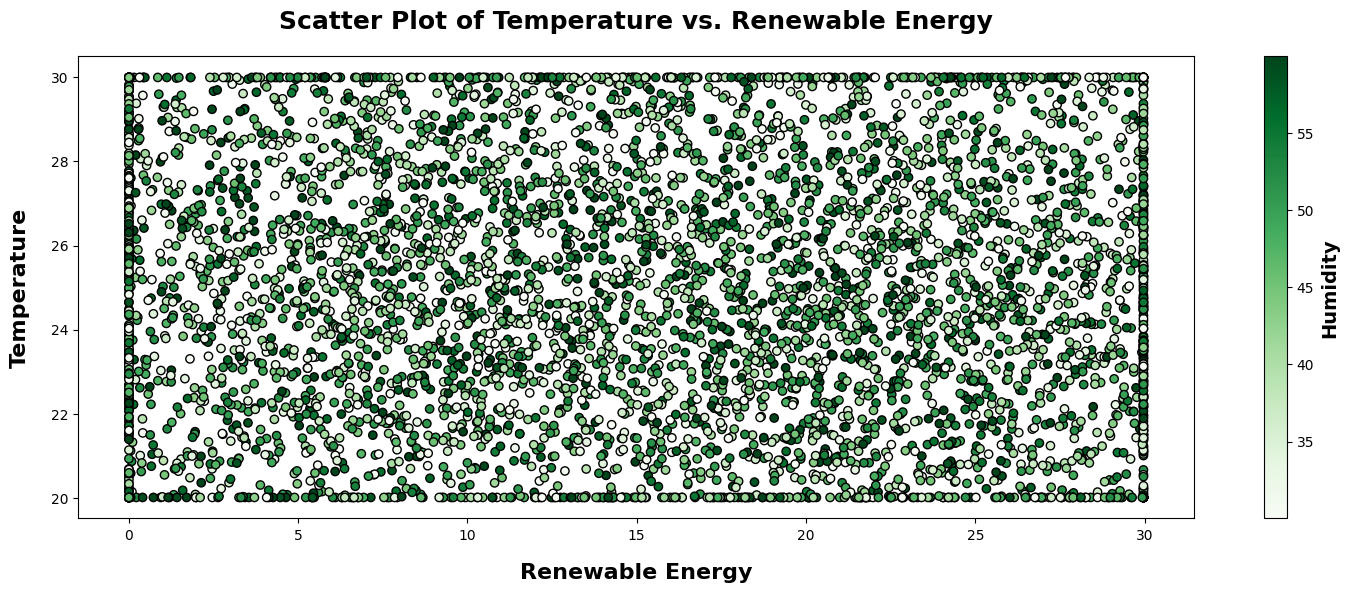

In [ ]:
# Scatter plot
plt.figure(figsize=(18, 6))
scatter = plt.scatter(df['RenewableEnergy'], df['Temperature'], c=df['Humidity'], cmap='Greens', edgecolor='k')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Humidity', fontsize=14, fontweight='bold')

# Labels and title with increased size and bold font
plt.xlabel('Renewable Energy', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('Temperature', fontsize=16, fontweight='bold', labelpad=15)
plt.title('Scatter Plot of Temperature vs. Renewable Energy',
          fontsize=18, fontweight='bold', pad=20)

# Show the plot
plt.show()




---


